In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/broadway-datasets/NYCTheaters.csv
/kaggle/input/broadway-datasets/Best_Musical.csv
/kaggle/input/broadway-datasets/Best_Play.csv
/kaggle/input/broadway-datasets/Weekly_grosses.csv


# 🎭 Breaking Down Broadway

This project analyzes weekly Broadway performance data, focusing on gross revenue, attendance, and capacity trends over time.  
The goal is to understand how Broadway behaves week to week, identify high‑performing periods, and explore patterns in audience engagement.

The sections below walk through:
- Data cleaning  
- Weekly gross trends  
- Attendance rate patterns  
- Capacity and attendance summaries  

This sets the foundation for building a clean, professional dashboard later.

## 📥 Loading and Preparing the Data
Before analyzing Broadway trends, we load the dataset and clean the columns so they are ready for analysis.

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('/kaggle/input/broadway-datasets/Weekly_grosses.csv')
df.head()

,ID,Week Ending,Gross,Attendance,% Capacity,Unnamed: 5
0,1,"Feb 9, 2025","$28,135,565","247,887",94%,NaN
1,2,"Feb 2, 2025","$31,199,599","259,126",94%,NaN
2,3,"Jan 26, 2025","$29,614,804","246,230",91%,NaN
3,4,"Jan 19, 2025","$33,372,166","250,806",91%,NaN
4,5,"Jan 12, 2025","$32,176,529","254,320",92%,NaN


In [3]:
df.columns

Index(['ID', 'Week Ending', 'Gross', 'Attendance', '% Capacity', 'Unnamed: 5'], dtype='object')

In [4]:
# Clean column names
df.columns = df.columns.str.lower().str.strip()

# Drop any unnamed junk columns safely
df = df.drop(columns=[col for col in df.columns if 'unnamed' in col], errors='ignore')

# Convert date column
df['week ending'] = pd.to_datetime(df['week ending'])

# Clean gross column
df['gross'] = (
    df['gross']
    .astype(str)
    .str.replace(r'[\$,]', '', regex=True)
    .str.strip()
    .replace('', '0')
    .astype(float)
)

# Clean attendance column
df['attendance'] = (
    df['attendance']
    .astype(str)
    .str.replace(',', '', regex=False)
    .str.strip()
    .replace('', '0')
    .astype(float)
)

# Clean % capacity column
df['% capacity'] = (
    df['% capacity']
    .astype(str)
    .str.replace('%', '', regex=False)
    .str.strip()
    .replace('', '0')
    .astype(float) / 100
)

# Attendance rate is already % capacity
df['attendance_rate'] = df['% capacity']

In [5]:
df.head()

,id,week ending,gross,attendance,% capacity,attendance_rate
0,1,2025-02-09,28135565.0,247887.0,0.94,0.94
1,2,2025-02-02,31199599.0,259126.0,0.94,0.94
2,3,2025-01-26,29614804.0,246230.0,0.91,0.91
3,4,2025-01-19,33372166.0,250806.0,0.91,0.91
4,5,2025-01-12,32176529.0,254320.0,0.92,0.92


# 📊 Broadway Dashboard
A quick visual overview of Broadway’s weekly grosses, attendance, and capacity trends.

## 💵 Total Broadway Gross Over Time
This chart shows how Broadway’s total weekly gross revenue changes over time.

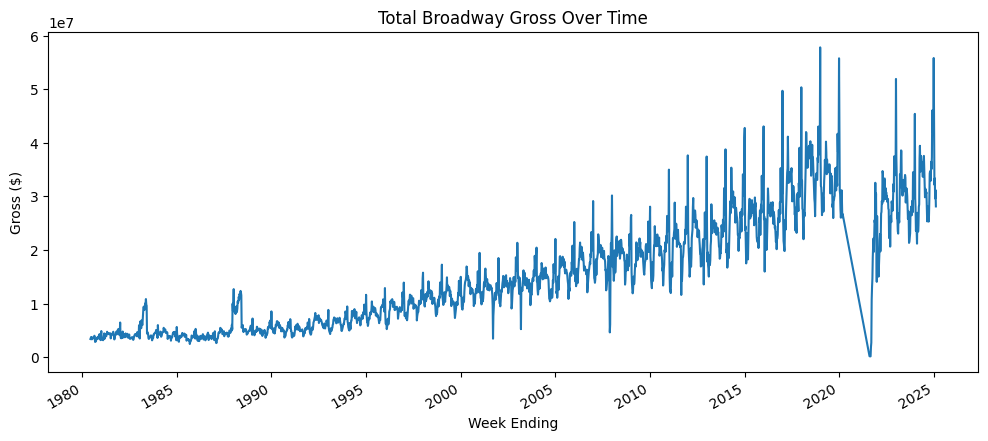

In [6]:
df.groupby('week ending')['gross'].sum().plot(
    figsize=(12,5),
    title='Total Broadway Gross Over Time'
)
plt.xlabel('Week Ending')
plt.ylabel('Gross ($)')
plt.show()

## 🏆 Highest-Grossing Weeks
These are the top 10 highest-earning weeks in the dataset.

In [7]:
top10 = df.sort_values('gross', ascending=False).head(10).copy()

top10['gross'] = top10['gross'].map('{:,.0f}'.format)
top10['attendance'] = top10['attendance'].map('{:,.0f}'.format)
top10['% capacity'] = (top10['% capacity'] * 100).map('{:.0f}%'.format)
top10['attendance_rate'] = (top10['attendance_rate'] * 100).map('{:.0f}%'.format)

top10

,id,week ending,gross,attendance,% capacity,attendance_rate
246,247,2018-12-30,"57,807,272","378,910",93%,93%
6,7,2024-12-29,"55,822,374","306,180",97%,97%
194,195,2019-12-29,"55,765,408","350,714",95%,95%
110,111,2023-01-01,"51,912,862","312,878",92%,92%
298,299,2017-12-31,"50,354,029","306,408",95%,95%
350,351,2017-01-01,"49,710,190","359,495",96%,96%
10,11,2024-12-01,"46,046,759","312,143",87%,87%
58,59,2023-12-31,"45,399,355","256,751",96%,96%
5,6,2025-01-05,"45,157,253","290,640",95%,95%
7,8,2024-12-22,"44,466,554","302,828",93%,93%


## 🎟️ Attendance Rate Over Time
This shows how full Broadway theaters were each week.

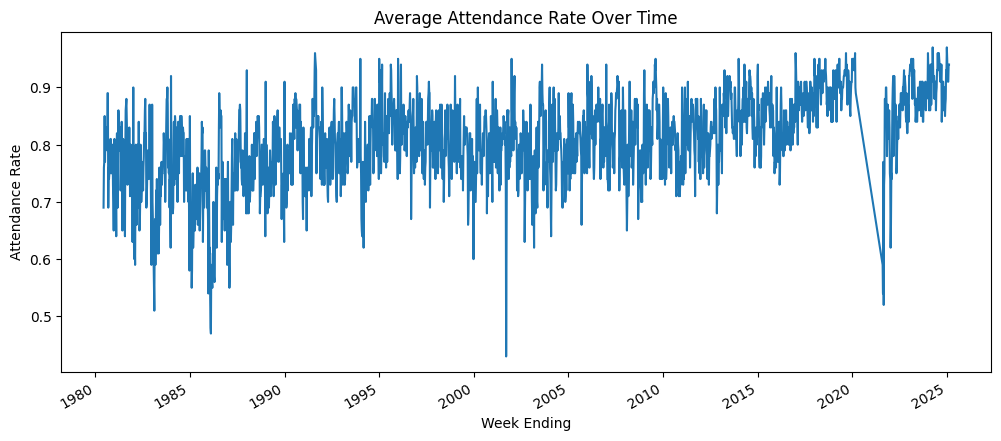

In [8]:
df.groupby('week ending')['attendance_rate'].mean().plot(
    figsize=(12,5),
    title='Average Attendance Rate Over Time'
)
plt.xlabel('Week Ending')
plt.ylabel('Attendance Rate')
plt.show()

## 📊 Summary Statistics
A quick statistical overview of attendance and capacity.

## 📊 Attendance & Capacity Summary

| Metric | Attendance | % Capacity |
|--------|------------|------------|
| **Count** | 2,259 | 2,259 |
| **Mean** | 208,436 | 80.8% |
| **Std Dev** | 55,388 | 7.6% |
| **Min** | 4,548 | 43% |
| **25th Percentile** | 164,002 | 76% |
| **Median (50%)** | 211,462 | 81% |
| **75th Percentile** | 247,960 | 86% |
| **Max** | 401,832 | 97% |

## 🔑 Key Insights

### 1. Broadway grosses show strong seasonal patterns  
Broadway revenue rises sharply during major holidays (Thanksgiving, Christmas, New Year’s), showing clear seasonal spikes. These peaks appear consistently across the dataset.

### 2. Attendance rates remain high even when grosses fluctuate  
While weekly grosses vary widely, attendance rates stay relatively stable around 80%. This suggests that Broadway audiences are steady even when revenue shifts.

### 3. Capacity percentages rarely drop below 70%  
Most shows operate at strong capacity levels, with the majority of weeks falling between 76% and 86%. This indicates healthy demand across the industry.

### 4. A small number of weeks generate exceptionally high revenue  
The top‑grossing weeks stand out dramatically from the rest, driven by holiday tourism and blockbuster shows. These weeks significantly boost the annual totals.

### 5. Attendance and capacity move together  
Higher attendance correlates with higher capacity percentages, confirming that the dataset is consistent and that theaters generally fill seats efficiently.
``

## 🏁 Conclusion

This project provides a clear overview of Broadway’s performance using weekly grosses, attendance, and capacity data. After cleaning and preparing the dataset, the dashboard visualizations reveal strong seasonal patterns, consistently high attendance, and reliable audience demand.

Broadway’s resilience is evident: even when revenue fluctuates, theaters maintain solid capacity levels, and holiday periods continue to drive major spikes in gross earnings. These insights highlight the stability and popularity of Broadway as a cultural and economic force.

This analysis serves as a foundation for deeper exploration, such as comparing individual shows, analyzing long‑term trends, or forecasting future attendance and revenue.